In [18]:
# Load the required libraries

# Pandas and NumPy for data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Import the dataset into the notebook

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/loan-default/Loan_default.csv")
df = df_.copy()

In [20]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [21]:
# Let's create random missing values in the dataset

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

ADIM 1: Veriye İlk Bakış

In [22]:
# Veri setinin ilk 3 gözlemini görelim.
df.head(n = 3)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,HPSK72WA7R,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,NaN,No,No,Other,Yes,0.0
2,C1OZ6DPJ8Y,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0


In [23]:
# Sondan 3 gözlem için tail() metodunu kullanalım.
df.tail(3)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255344,XQK1UUUNGP,56.0,84820.0,208294.0,597.0,70.0,3.0,5.29,60.0,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0.0
255345,JAO28CPL4H,42.0,85109.0,60575.0,809.0,40.0,1.0,NaN,48.0,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0.0
255346,ZTH91CGL0B,62.0,22418.0,18481.0,636.0,113.0,2.0,6.73,12.0,0.48,NaN,Unemployed,Divorced,Yes,No,Education,Yes,0.0


In [24]:
#Veri setindeki satır ve sütun sayılarını .shape kullanarak görebiliriz.
df.shape # -> (satır, sütun)

(255347, 18)

In [25]:
#Veri setindeki değişkenlerin isimlerine erişmek istersek df.columns kullanabiliriz.

# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default'] 

Veri seti içerisinde toplam 18 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [26]:
# info() metodunu kullanarak,veri setine ait yapısal bilgilere ulaşabiliriz.
# Bu noktada elimizde kolonların veri tiplerinin doğru olup olmadığını, kayıt sayılarını, kolon isimlerini mutlaka kontrol etmeliyiz.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          247833 non-null  object 
 1   Age             247905 non-null  float64
 2   Income          247781 non-null  float64
 3   LoanAmount      247712 non-null  float64
 4   CreditScore     247685 non-null  float64
 5   MonthsEmployed  247824 non-null  float64
 6   NumCreditLines  247902 non-null  float64
 7   InterestRate    247879 non-null  float64
 8   LoanTerm        247836 non-null  float64
 9   DTIRatio        247757 non-null  float64
 10  Education       247921 non-null  object 
 11  EmploymentType  247809 non-null  object 
 12  MaritalStatus   247733 non-null  object 
 13  HasMortgage     247761 non-null  object 
 14  HasDependents   247846 non-null  object 
 15  LoanPurpose     247720 non-null  object 
 16  HasCoSigner     247769 non-null  object 
 17  Default   

In [27]:
# Sadece elimizdeki değişkenleri görmek ve tiplerini görüntülemek istersek, dtypes kullanabiliriz.
df.dtypes

LoanID             object
Age               float64
Income            float64
LoanAmount        float64
CreditScore       float64
MonthsEmployed    float64
NumCreditLines    float64
InterestRate      float64
LoanTerm          float64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default           float64
dtype: object

Elimizdeki veri setinde hem kategorik hem de numerik özellikler bulunduğundan, bu özellikleri ayrı listelerde tutmak faydalı olabilir. Özellikle kolon bazında işlem yapmamız gerektiğinde, bu listeleri bir filtre olarak kullanmak işleri kolaylaştırabilir. Böylece her bir veri türü için uygun işlemleri daha etkin bir şekilde gerçekleştirebiliriz.

In [28]:
# List comprehension

categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [29]:
categorical_features, numerical_features

(['LoanID',
  'Education',
  'EmploymentType',
  'MaritalStatus',
  'HasMortgage',
  'HasDependents',
  'LoanPurpose',
  'HasCoSigner'],
 ['Age',
  'Income',
  'LoanAmount',
  'CreditScore',
  'MonthsEmployed',
  'NumCreditLines',
  'InterestRate',
  'LoanTerm',
  'DTIRatio',
  'Default'])

Örneğin, veri tipi Object olan kategorik değişkenlerin veri tipini Categorical olarak değiştirmek istersek, basitçe kolon isimleri üzerinde bir döngü kurarak filtreleme yapabiliriz.

Döngü içerisinde, mevcut kolon ismi categorical_features içerisinde bulunuyorsa, o zaman o kolonun tipini Categorical olarak değiştirelim, bulunmuyorsa bir işlem yapmayalım.

In [30]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   LoanID          247833 non-null  category
 1   Age             247905 non-null  float64 
 2   Income          247781 non-null  float64 
 3   LoanAmount      247712 non-null  float64 
 4   CreditScore     247685 non-null  float64 
 5   MonthsEmployed  247824 non-null  float64 
 6   NumCreditLines  247902 non-null  float64 
 7   InterestRate    247879 non-null  float64 
 8   LoanTerm        247836 non-null  float64 
 9   DTIRatio        247757 non-null  float64 
 10  Education       247921 non-null  category
 11  EmploymentType  247809 non-null  category
 12  MaritalStatus   247733 non-null  category
 13  HasMortgage     247761 non-null  category
 14  HasDependents   247846 non-null  category
 15  LoanPurpose     247720 non-null  category
 16  HasCoSigner     247769 non-null  categ

In [32]:
# Veri setimizin betimsel istatistiklerine ulaşmak için describe() fonksiyonunu kullanıyoruz.
# Bu fonksiyon eksik verileri göz ardı eder ve default olarak yalnızca numerik değişkenlere bakar.
df.describe().T # -> .T eklentisi elde edeceğimiz çıktıyı transpose eder.

,count,mean,std,min,25%,50%,75%,max
Age,247905.0,43.501801,14.991234,18.0,31.00,43.00,56.00,69.0
Income,247781.0,82481.418014,38975.009676,15000.0,48783.00,82428.00,116237.00,149999.0
LoanAmount,247712.0,127544.413165,70845.747860,5000.0,66139.75,127482.50,188932.00,249999.0
CreditScore,247685.0,574.316172,158.896966,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,247824.0,59.548377,34.650864,0.0,30.00,60.00,90.00,119.0
NumCreditLines,247902.0,2.500799,1.117014,1.0,2.00,2.00,3.00,4.0
InterestRate,247879.0,13.493903,6.637186,2.0,7.77,13.46,19.25,25.0
LoanTerm,247836.0,36.023290,16.964194,12.0,24.00,36.00,48.00,60.0
DTIRatio,247757.0,0.500298,0.230932,0.1,0.30,0.50,0.70,0.9
Default,247761.0,0.116160,0.320418,0.0,0.00,0.00,0.00,1.0


ADIM 2: Eksik Veri Analizi

In [33]:
# Eksik Verilerin Gözlemlenmesi
df.isnull().sum()

LoanID            7514
Age               7442
Income            7566
LoanAmount        7635
CreditScore       7662
MonthsEmployed    7523
NumCreditLines    7445
InterestRate      7468
LoanTerm          7511
DTIRatio          7590
Education         7426
EmploymentType    7538
MaritalStatus     7614
HasMortgage       7586
HasDependents     7501
LoanPurpose       7627
HasCoSigner       7578
Default           7586
dtype: int64

In [34]:
# Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz.
df.isna().sum().sum()

135812

In [35]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

LoanID            247833
Age               247905
Income            247781
LoanAmount        247712
CreditScore       247685
MonthsEmployed    247824
NumCreditLines    247902
InterestRate      247879
LoanTerm          247836
DTIRatio          247757
Education         247921
EmploymentType    247809
MaritalStatus     247733
HasMortgage       247761
HasDependents     247846
LoanPurpose       247720
HasCoSigner       247769
Default           247761
dtype: int64

In [36]:
# Veri setinde toplam kaç adet eksik ve eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 4460434 adet eksik olmayan, 135812 eksik gözlem var.


In [37]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
1,HPSK72WA7R,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,NaN,No,No,Other,Yes,0.0
8,1R0N3LGNRJ,36.0,42053.0,92357.0,827.0,83.0,1.0,23.94,48.0,0.20,NaN,Self-employed,Divorced,Yes,No,Education,No,1.0
9,CM9L1GTT2P,40.0,NaN,228510.0,NaN,114.0,4.0,9.09,48.0,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0.0
11,Y8UETC3LSG,28.0,149227.0,139759.0,375.0,56.0,NaN,5.84,36.0,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1.0
13,NaN,NaN,117550.0,95744.0,395.0,112.0,4.0,3.58,24.0,0.73,NaN,Unemployed,Single,No,No,Auto,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255341,AKXAXQN7PG,NaN,129890.0,116119.0,701.0,38.0,3.0,9.91,24.0,0.23,High School,Part-time,Divorced,Yes,No,Home,Yes,1.0
255342,8C6S86ESGC,19.0,37979.0,210682.0,541.0,109.0,4.0,14.11,12.0,NaN,Bachelor's,Full-time,Married,No,No,Other,No,0.0
255343,98R4KDHNND,32.0,51953.0,189899.0,NaN,14.0,2.0,11.55,NaN,0.21,High School,Part-time,Divorced,NaN,No,Home,No,1.0
255345,JAO28CPL4H,42.0,85109.0,60575.0,809.0,40.0,1.0,NaN,48.0,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0.0


In [38]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
2,C1OZ6DPJ8Y,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,V2KKSFM3UN,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,EY08JDHTZP,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0
5,A9S62RQ7US,25.0,90298.0,90448.0,720.0,18.0,2.0,22.72,24.0,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1.0


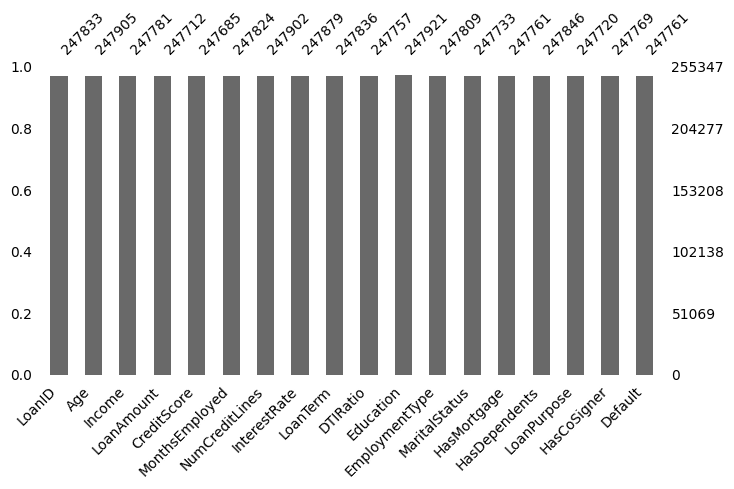

In [39]:
#!pip install missingno 
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

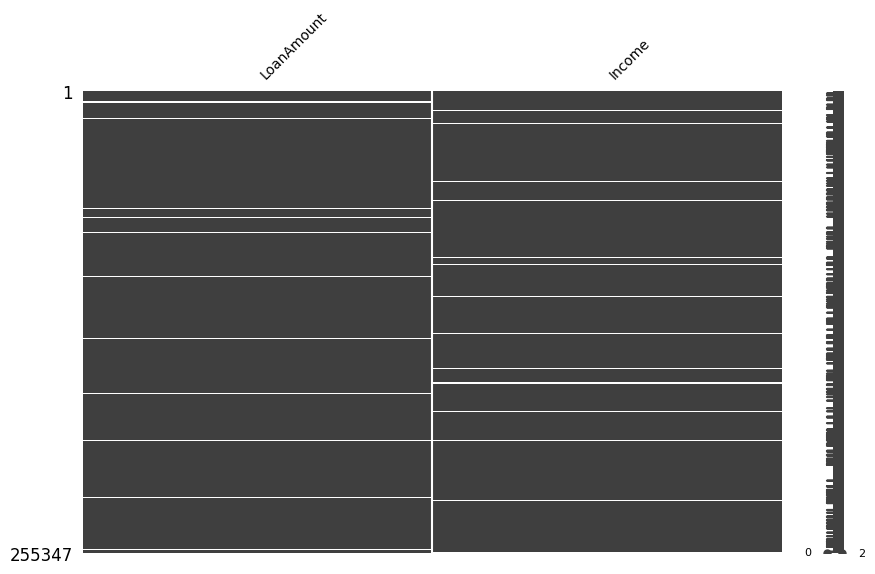

In [40]:
# Eksik değerlerin görsel analizi
msno.matrix(df=df[['LoanAmount', 'Income']],  # Eksik değerleri incelemek istediğiniz sütunları buraya ekleyin
            figsize=(10, 6),
            fontsize=10)

plt.show()

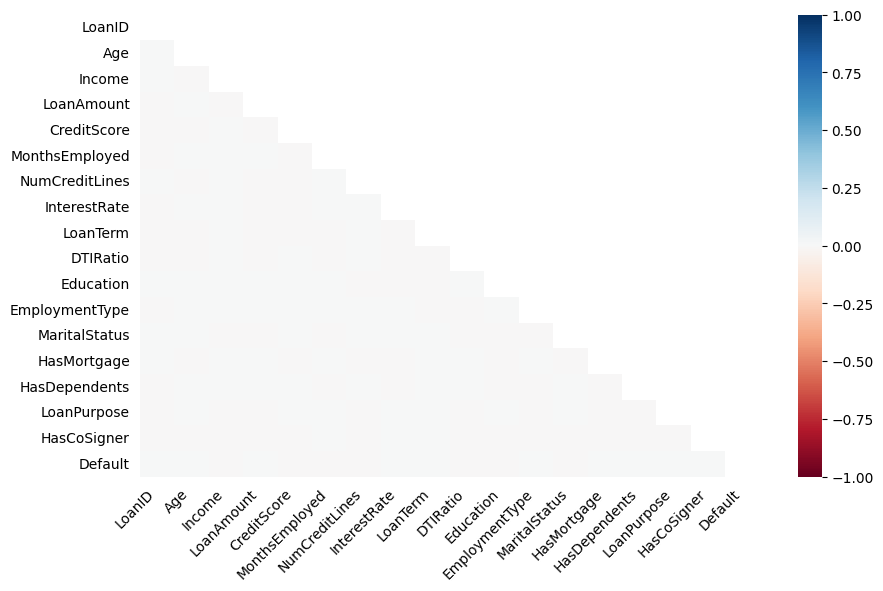

In [41]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

In [42]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı kullanılmalı veya atama yapılmalıdır.

df.dropna(inplace = False)[:5]
#df = df.dropna()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
2,C1OZ6DPJ8Y,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,V2KKSFM3UN,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,EY08JDHTZP,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0
5,A9S62RQ7US,25.0,90298.0,90448.0,720.0,18.0,2.0,22.72,24.0,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1.0


In [43]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')[:5]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,HPSK72WA7R,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,NaN,No,No,Other,Yes,0.0
2,C1OZ6DPJ8Y,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,V2KKSFM3UN,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,EY08JDHTZP,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0


In [44]:
# Değişken bazında silmek için;
df.dropna(axis = 1)

""
0
1
2
3
4
...
255342
255343
255344
255345


In [45]:
# Eksik Verilerin Doldurulması
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.

df_fillna = df.copy()

df_fillna.head(3)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,HPSK72WA7R,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,NaN,No,No,Other,Yes,0.0
2,C1OZ6DPJ8Y,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0


In [46]:
df_fillna.isna().sum()

LoanID            7514
Age               7442
Income            7566
LoanAmount        7635
CreditScore       7662
MonthsEmployed    7523
NumCreditLines    7445
InterestRate      7468
LoanTerm          7511
DTIRatio          7590
Education         7426
EmploymentType    7538
MaritalStatus     7614
HasMortgage       7586
HasDependents     7501
LoanPurpose       7627
HasCoSigner       7578
Default           7586
dtype: int64

In [47]:
# Sayısal Değişkenlerin Doldurulması
# Numerik bir değişkenin mean değeriyle doldurulması

mean_income = df_fillna['Income'].mean()

df_fillna['Income'].fillna(value = mean_income, inplace = True)

df_fillna.isna().sum()

LoanID            7514
Age               7442
Income               0
LoanAmount        7635
CreditScore       7662
MonthsEmployed    7523
NumCreditLines    7445
InterestRate      7468
LoanTerm          7511
DTIRatio          7590
Education         7426
EmploymentType    7538
MaritalStatus     7614
HasMortgage       7586
HasDependents     7501
LoanPurpose       7627
HasCoSigner       7578
Default           7586
dtype: int64

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,247905.0,43.501801,14.991234,18.0,31.00,43.00,56.00,69.0
Income,247781.0,82481.418014,38975.009676,15000.0,48783.00,82428.00,116237.00,149999.0
LoanAmount,247712.0,127544.413165,70845.747860,5000.0,66139.75,127482.50,188932.00,249999.0
CreditScore,247685.0,574.316172,158.896966,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,247824.0,59.548377,34.650864,0.0,30.00,60.00,90.00,119.0
NumCreditLines,247902.0,2.500799,1.117014,1.0,2.00,2.00,3.00,4.0
InterestRate,247879.0,13.493903,6.637186,2.0,7.77,13.46,19.25,25.0
LoanTerm,247836.0,36.023290,16.964194,12.0,24.00,36.00,48.00,60.0
DTIRatio,247757.0,0.500298,0.230932,0.1,0.30,0.50,0.70,0.9
Default,247761.0,0.116160,0.320418,0.0,0.00,0.00,0.00,1.0


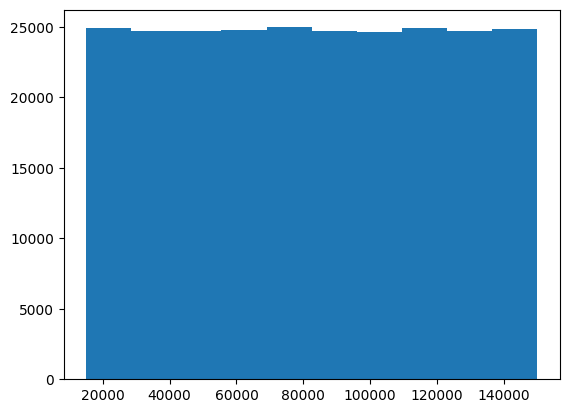

In [49]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(df['Income'])
plt.show()

In [50]:
# Kategorik Değişkenlerin Doldurulması
# Kategorik bir değişkenin mode değeriyle doldurulması

# Education değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['Education'].isna().sum()

# Education değişkeninde en çok tekrar eden değeri(mode) alalım.
education_mode = df_fillna['Education'].mode()

# Education değişkenini mode değeri ile dolduralım.
df_fillna['Education'] = df_fillna['Education'].fillna(value = education_mode[0])

# Education değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()
 

LoanID            7514
Age               7442
Income               0
LoanAmount        7635
CreditScore       7662
MonthsEmployed    7523
NumCreditLines    7445
InterestRate      7468
LoanTerm          7511
DTIRatio          7590
Education            0
EmploymentType    7538
MaritalStatus     7614
HasMortgage       7586
HasDependents     7501
LoanPurpose       7627
HasCoSigner       7578
Default           7586
dtype: int64

ADIM 3: Kategorik Değişken Analizi

In [51]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [52]:
# Kategorik Değişken İşlemleri
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.

df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,I38PQUQS96,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,HPSK72WA7R,Master's,Full-time,Married,No,No,Other,Yes
2,C1OZ6DPJ8Y,Master's,Unemployed,Divorced,Yes,Yes,Auto,No


In [53]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df_categorical["Education"].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [54]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 255347 unique values in "LoanID" categorical feature.

There are 4 unique values in "Education" categorical feature.

There are 4 unique values in "EmploymentType" categorical feature.

There are 3 unique values in "MaritalStatus" categorical feature.

There are 2 unique values in "HasMortgage" categorical feature.

There are 2 unique values in "HasDependents" categorical feature.

There are 5 unique values in "LoanPurpose" categorical feature.

There are 2 unique values in "HasCoSigner" categorical feature.



In [55]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

LoanID
I38PQUQS96    1
WGB0GD3150    1
XATSFC5YHN    1
CQXDW5VBAG    1
6AIVUNAJG8    1
             ..
ZBK3GDL2LI    1
SP7XY2LPYA    1
Q2DO8ENMV1    1
5EXD8N4MT4    1
ZTH91CGL0B    1
Name: count, Length: 255347, dtype: int64
 *********************************************
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
 *********************************************
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
 *********************************************
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
 *********************************************
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
 *********************************************
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
 *********************************************
LoanPurpose


In [56]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
educ_categories = df["Education"].unique().tolist()[::-1]
educ_categories

['PhD', 'High School', "Master's", "Bachelor's"]

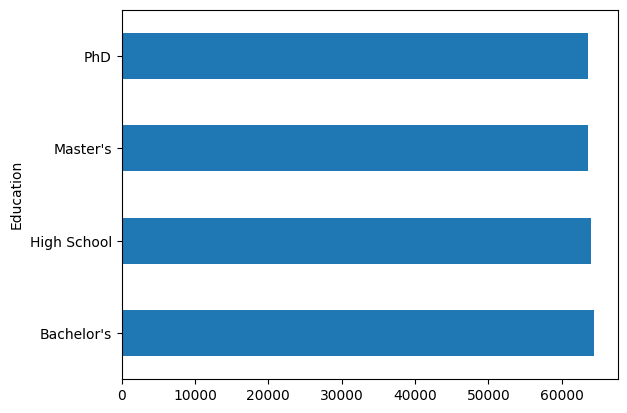

In [57]:
# Kategorik Değişkenlerde Görselleştirme İşlemleri
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
df['Education'].value_counts().plot.barh();

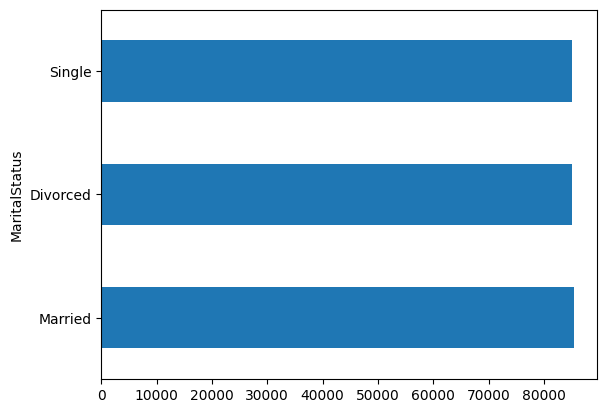

In [58]:
df['MaritalStatus'].value_counts().plot.barh();

<Axes: xlabel='count', ylabel='Education'>

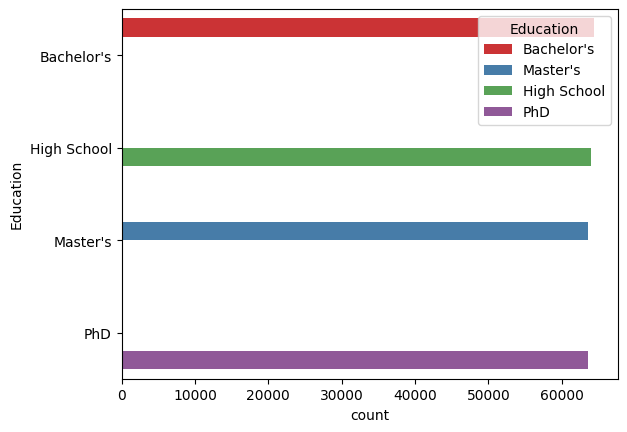

In [59]:
sns.countplot(
    data=df,
    y="Education",
    hue="Education",
    order=df["Education"].value_counts().index,
    palette="Set1"
)

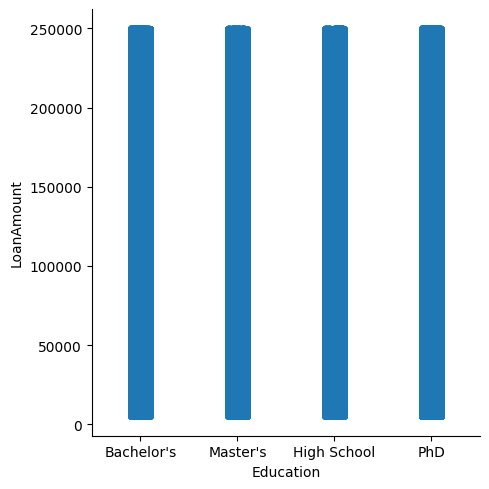

In [60]:
sns.catplot(data = df,
            x = "Education",
            y = "LoanAmount");

Text(0.5, 1.0, 'Eğitim Seviyesine ve Çalışma Türüne Göre Kredi Miktarı')

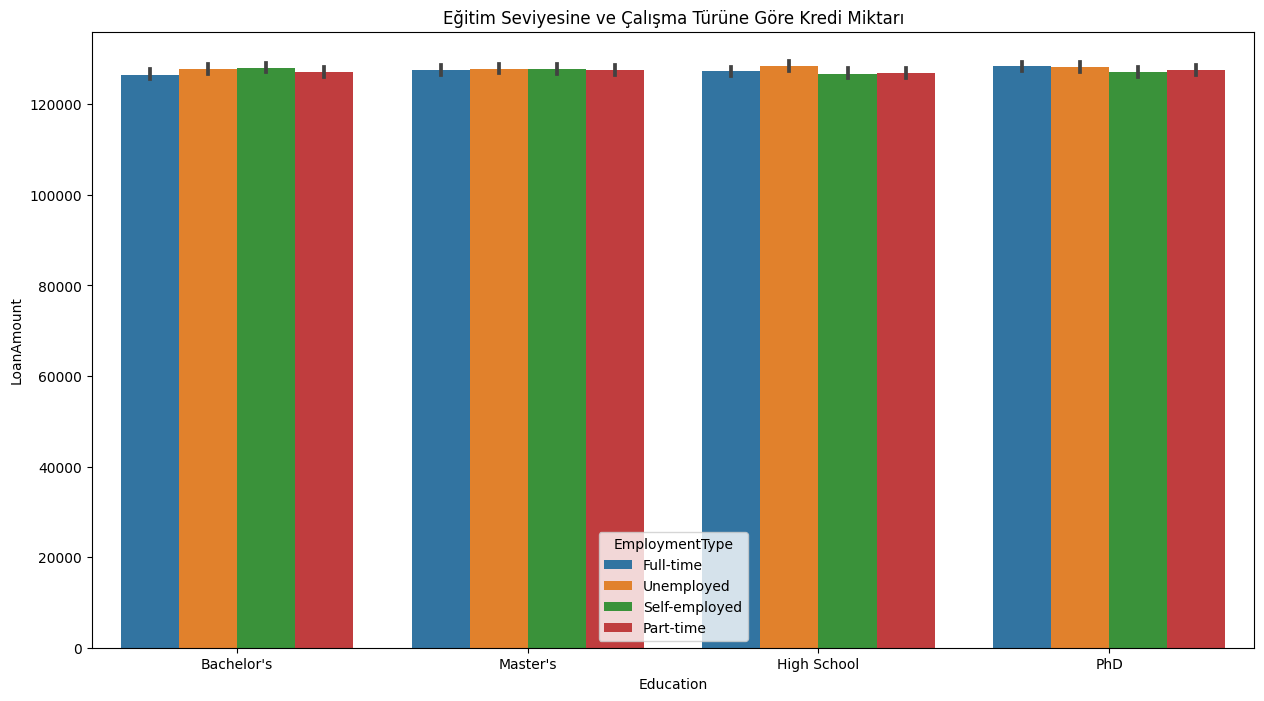

In [61]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "Education",
            y = "LoanAmount",
            hue = "EmploymentType");
plt.title("Eğitim Seviyesine ve Çalışma Türüne Göre Kredi Miktarı")

In [62]:
# Kategorik Gruplama (groupby) İşlemleri
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [63]:
# Eğitim seviyesine göre gruplama yaparak ortalama default (geri ödeme yapmama) oranını hesapla
df_grouped_education = df.groupby('Education')['Default'].mean().reset_index()

df_grouped_education

,Education,Default
0,Bachelor's,0.121011
1,High School,0.128789
2,Master's,0.108717
3,PhD,0.105860


In [64]:
# İstihdam durumuna göre gruplama yaparak ortalama default oranını hesapla
df_grouped_employment = df.groupby('EmploymentType')['Default'].mean().reset_index()

df_grouped_employment

,EmploymentType,Default
0,Full-time,0.094634
1,Part-time,0.119652
2,Self-employed,0.114620
3,Unemployed,0.135529


In [65]:
# Medeni duruma göre gruplama yaparak ortalama default oranını hesapla
df_grouped_marital = df.groupby('MaritalStatus')['Default'].mean().reset_index()

df_grouped_marital

,MaritalStatus,Default
0,Divorced,0.125328
1,Married,0.103972
2,Single,0.119124


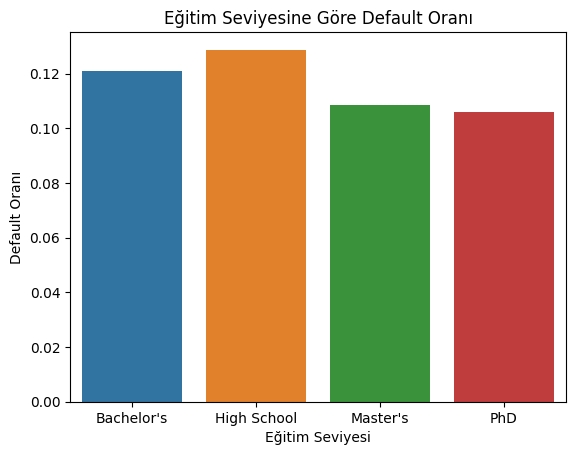

In [66]:
# Eğitim seviyesine göre gruplama sonucunu görselleştirme
sns.barplot(x='Education', y='Default', data=df_grouped_education)
plt.title('Eğitim Seviyesine Göre Default Oranı')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Default Oranı')
plt.show()

ADIM 4: Sürekli Değişken Analizi

In [67]:
# Sürekli Değişkenlerin İncelenmesi
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0


In [68]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [69]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [70]:
give_stats(dataframe = df)

**********Age**********
Mean value of Age is 43.50
Std value of Age is 14.99
Max value of Age is 69
Min value of Age is 18
Count value of Age is 255347
Median value of Age is 43.0

**********Income**********
Mean value of Income is 82499.30
Std value of Income is 38963.01
Max value of Income is 149999
Min value of Income is 15000
Count value of Income is 255347
Median value of Income is 82466.0

**********LoanAmount**********
Mean value of LoanAmount is 127578.87
Std value of LoanAmount is 70840.71
Max value of LoanAmount is 249999
Min value of LoanAmount is 5000
Count value of LoanAmount is 255347
Median value of LoanAmount is 127556.0

**********CreditScore**********
Mean value of CreditScore is 574.26
Std value of CreditScore is 158.90
Max value of CreditScore is 849
Min value of CreditScore is 300
Count value of CreditScore is 255347
Median value of CreditScore is 574.0

**********MonthsEmployed**********
Mean value of MonthsEmployed is 59.54
Std value of MonthsEmployed is 34.64
Ma

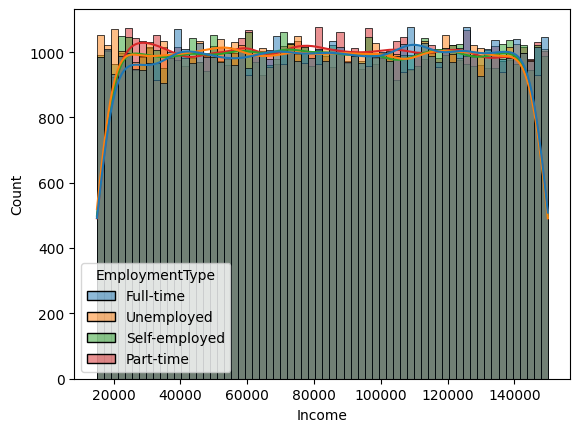

In [71]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
# İstihdam türüne göre Income (Gelir) değişkeninin dağılımını görmek için 
sns.histplot(data=df, x="Income", kde=True, hue="EmploymentType");

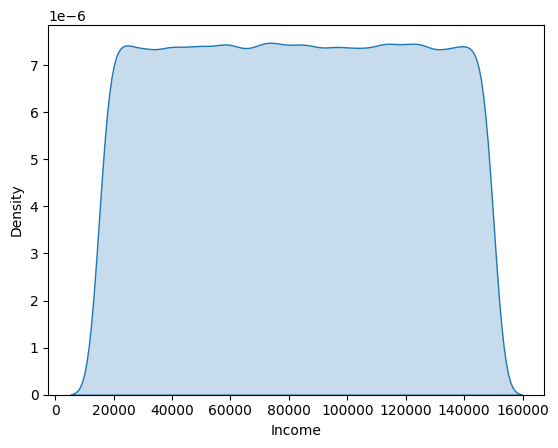

In [72]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['Income'], fill = True);

Text(0.5, 1.0, 'Eğitim Seviyesine ve İstihdam Durumuna Göre Yıllık Gelir Dağılımı')

<Figure size 1200x800 with 0 Axes>

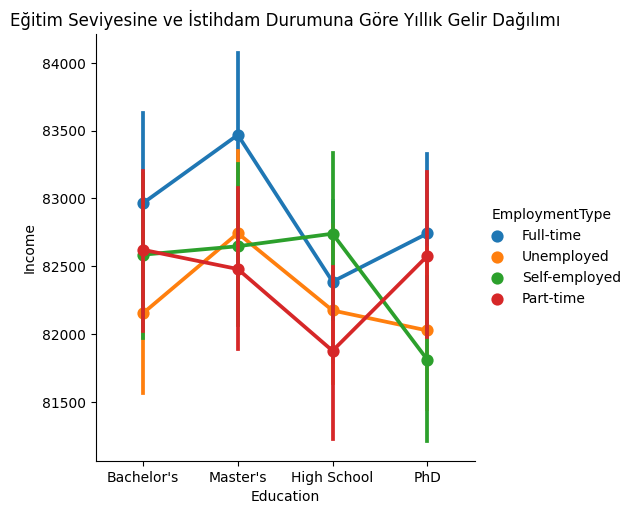

In [73]:
# Catplot ile numerik bir değişkenin kategorik bazda ve kırılımdaki dağılımını görebiliriz.
plt.figure(figsize=(12, 8))
sns.catplot(data=df, x="Education", y="Income", hue="EmploymentType", kind="point")
plt.title("Eğitim Seviyesine ve İstihdam Durumuna Göre Yıllık Gelir Dağılımı")


Text(0.5, 1.0, 'İstihdam Durumuna ve Kredi Amacına Göre Yıllık Gelir Dağılımı')

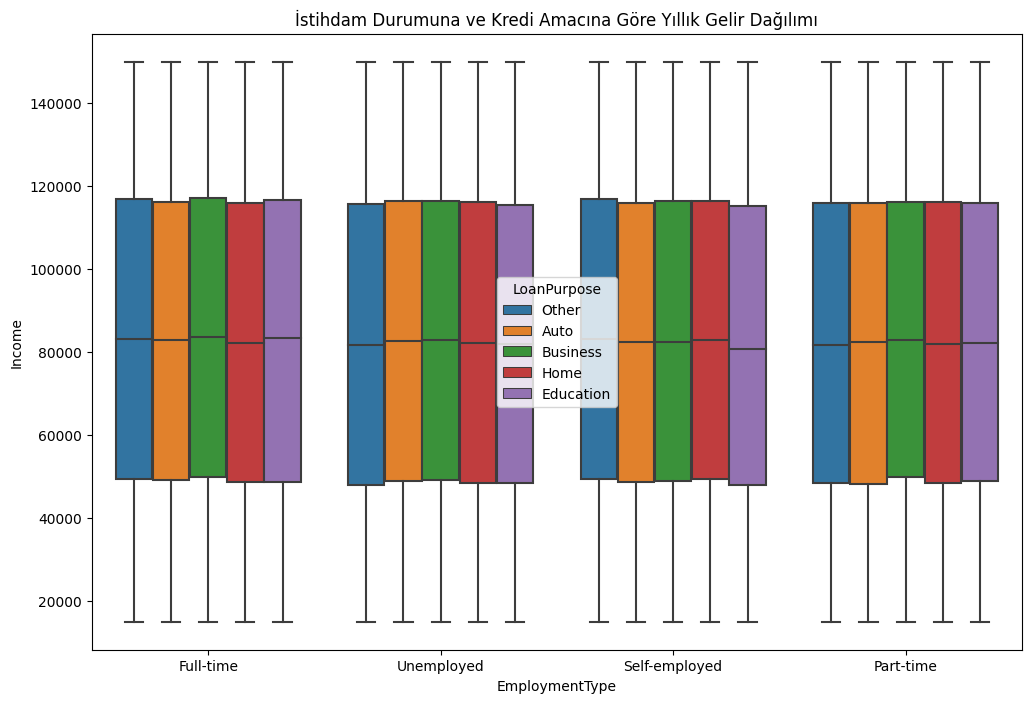

In [74]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, 
            x="EmploymentType", 
            y="Income", 
            hue="LoanPurpose")
plt.title("İstihdam Durumuna ve Kredi Amacına Göre Yıllık Gelir Dağılımı")


In [ ]:
# pairplot numerik değişkenler arasındaki saçılım ve yoğunluk ilişkilerini gösterir.
sns.pairplot(data = df, hue = "Age");

In [ ]:
# Heatmap ise corr() (korelasyon) methodu ile kullanıldığında numerik değerler arasındaki ilişki kuvvetini gösterir.
plt.figure(figsize = (10, 7))
sns.heatmap(df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'DTIRatio']].corr(), annot = True, cmap = "coolwarm");

ADIM 5: Aykırı Değer Analizi ( Outliers )

In [ ]:
df = df_.copy()

In [ ]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, 
            y=df["LoanAmount"], 
            orient="v", 
            palette="Set3")
plt.title("LoanAmount Değişkenindeki Aykırı Değerler")
plt.show()

In [ ]:
df_loanAmount = df['LoanAmount']
df_loanAmount

Boxplot ile aykırı değerleri yalnızca görselleştirebiliriz. Eğer bu değerlerin tam olarak hangi satırlara ait olduğunu öğrenmek istiyorsanız, IQR hesaplayarak belirli bir eşik değerinin dışındaki gözlemleri tespit edebilirsiniz.

In [ ]:
# Quantile değerlerin belirlenmesi.
Q1 = df_loanAmount.quantile(0.25)
Q3 = df_loanAmount.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

In [ ]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = df_loanAmount[df_loanAmount > upper_fence].index

outlier_idx

In [ ]:
df_loanAmount[df_loanAmount > upper_fence]

ADIM 6: Feature Engineering

In [ ]:
df.head()

In [ ]:
# Kredi/gelir oranı (Loan-to-Income Ratio)
# Bu oran, bireyin aldığı kredi miktarını yıllık gelirine böler. Yüksek bir oran, bireyin ödeyememe riskinin yüksek olabileceğini gösterebilir.

df['LoanToIncomeRatio'] = df['LoanAmount'] / df['Income']
print(df[['LoanAmount', 'Income', 'LoanToIncomeRatio']].head())

In [ ]:
# Kredi Skoru Kategorisi
# Kredi skoru değişkenini kategorilere ayırabilirsiniz
def categorize_credit_score(score):
    if score <= 300:
        return "Poor"
    elif score <= 600:
        return "Fair"
    else:
        return "Good"

df['CreditScoreCategory'] = df['CreditScore'].apply(categorize_credit_score)


[Github](https://github.com/cimsitaleyna29/Data_Analysis_Loan_Prediction)